# <center>CMSE 202 Final Project</center>

# ___How have carbon emissions affected climate change?___

## _Group Members: Peter Fu Chen, Riley Millikan, Mike Liu, Alex Tran, Trevor Parcella_

_Background and Motivation:_

_The purpose of this project is to explore the relationship between carbon emissions and climate change. Carbon emissions are known to be a leading contributor to climate change, which has significant impacts on the environment and human society. Therefore, understanding the relationship between these two variables is crucial._

_Project Overview:_

_This project aims to analyze the historical trends of carbon emissions and climate change, specifically examining the relationship between carbon emissions and rising temperatures, the impact of carbon emissions on extreme weather events, and the role of carbon emissions in sea level rise._

_Goals:_

_The goals of this project are to analyze historical trends in carbon emissions and climate change, examine the relationship between carbon emissions and various climate variables such as temperature, weather events, sea level, and ocean acidity, create visualizations to illustrate findings, and draw conclusions about the impact of carbon emissions on climate change._

## Methodology

### This research is carried out from the following aspects.

- Data collection and cleaning: Historical data on carbon emissions and climate variables will be collected and cleaned using Python libraries such as pandas and numpy.
- Data analysis: Various statistical and machine learning techniques will be used to analyze the relationship between carbon emissions and climate variables.
- Visualization: Data visualizations will be created using Python libraries such as matplotlib and seaborn to illustrate the relationship between carbon emissions and climate variables.
- Conclusion: Based on the analysis and visualizations, conclusions will be drawn about the impact of carbon emissions on climate change, and policy recommendations may be made to address this pressing issue.


In [32]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.cluster import KMeans
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
%matplotlib inline
sns.set(style='darkgrid')

### Data preparation

In [33]:
co2_emission=pd.read_csv('annual-co2-emissions-per-country.csv')
co2_emission

,Entity,Code,Year,Annual CO₂ emissions
0,Afghanistan,AFG,1949,14656.0
1,Afghanistan,AFG,1950,84272.0
2,Afghanistan,AFG,1951,91600.0
3,Afghanistan,AFG,1952,91600.0
4,Afghanistan,AFG,1953,106256.0
...,...,...,...,...
31344,Zimbabwe,ZWE,2017,9596071.0
31345,Zimbabwe,ZWE,2018,11795478.0
31346,Zimbabwe,ZWE,2019,11114607.0
31347,Zimbabwe,ZWE,2020,10607897.0


In [34]:
years=[i for i in range(1850,2016)]
yearly_emissions=[]
for year in years:
    temp=co2_emission.where(co2_emission["Year"]==year)
    temp=temp.dropna()
    yearly_emissions.append(sum(temp.iloc[:, -1]))

print(yearly_emissions)
len(yearly_emissions)

[393792063.99998, 397609954.0, 415101883.8, 434418498.0, 510277958.0, 520331959.02, 554583046.0, 559778574.0, 568342589.0320001, 602623307.0, 661282556.0, 695469067.1, 708113347.0, 755718136.0, 814180585.04, 864613960.0, 891939390.0, 955629821.738, 981504993.0, 1042261476.0, 1065073489.0009999, 1132285964.0, 1252743591.06, 1330838148.1, 1245994516.012, 1351598259.06, 1371105419.7, 1398197026.9, 1408758430.01, 1509734414.97, 1707409320.0, 1764810069.49, 1863843816.9, 1982064830.0, 2004348573.0, 2019342708.49, 2050950913.01, 2153515582.01, 2384543743.01, 2383599229.0, 2596916426.0, 2717747805.2200003, 2740176547.8, 2707337397.06, 2801715347.9700003, 2970545187.0, 3067402834.976, 3212601042.4700003, 3388531466.916, 3701596174.5039997, 3904419019.84, 4033488889.0299997, 4135368078.02, 4508189710.03, 4559497590.0, 4854626348.48, 5069468615.98, 5776615844.0, 5552808533.3, 5780936166.940001, 6067639835.0, 6158429778.03, 6471076814.0, 7011730454.97, 6359824800.2, 6268756370.88, 6770554903.13, 

166

co2 emissions from 1850 to 2015

In [35]:
sea_level=pd.read_csv("sea_levels_2015.csv")
sea_level

,Time,GMSL,GMSL uncertainty
0,1880-01-15,-183.0,24.2
1,1880-02-15,-171.1,24.2
2,1880-03-15,-164.3,24.2
3,1880-04-15,-158.2,24.2
4,1880-05-15,-158.7,24.2
...,...,...,...
1603,2013-08-15,71.6,8.8
1604,2013-09-15,68.8,8.8
1605,2013-10-15,66.4,8.9
1606,2013-11-15,59.7,9.0


In [36]:
sea_level=sea_level[["Time",'GMSL']]
sea_level

sea_level["Time"]=pd.to_datetime(sea_level['Time'])
sea_level['year']=sea_level['Time'].dt.year

annual_sea_level=sea_level.groupby("year").agg({'GMSL':["mean"]}).reset_index()

print(len(annual_sea_level))
annual_sea_level

134


/var/folders/ct/9dggbn3n5blc83qhjqtlcryw0000gn/T/ipykernel_46611/1741312422.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sea_level["Time"]=pd.to_datetime(sea_level['Time'])


,year,GMSL
,,mean
0,1880,-158.725000
1,1881,-153.058333
2,1882,-169.883333
3,1883,-164.591667
4,1884,-143.750000
...,...,...
129,2009,58.016667
130,2010,65.750000
131,2011,67.300000


In [37]:
ocean_temp=pd.read_csv("ocean_data.csv", skiprows=4)
ocean_temp

,Year,Value
0,1850,-0.06
1,1851,0.00
2,1852,0.03
3,1853,0.01
4,1854,-0.02
...,...,...
168,2018,0.66
169,2019,0.74
170,2020,0.72
171,2021,0.63


In [38]:
ocean_temp=ocean_temp.drop(1).drop(ocean_temp.index[-7:])
ocean_temp

,Year,Value
0,1850,-0.06
2,1852,0.03
3,1853,0.01
4,1854,-0.02
5,1855,0.01
...,...,...
161,2011,0.41
162,2012,0.48
163,2013,0.52
164,2014,0.61


In [39]:
land_temp=pd.read_csv("global temperature.csv")
land_temp

,dt,LandAverageTemperature,LandAverageTemperatureUncertainty,LandMaxTemperature,LandMaxTemperatureUncertainty,LandMinTemperature,LandMinTemperatureUncertainty,LandAndOceanAverageTemperature,LandAndOceanAverageTemperatureUncertainty
0,1750-01-01,3.034,3.574,NaN,NaN,NaN,NaN,NaN,NaN
1,1750-02-01,3.083,3.702,NaN,NaN,NaN,NaN,NaN,NaN
2,1750-03-01,5.626,3.076,NaN,NaN,NaN,NaN,NaN,NaN
3,1750-04-01,8.490,2.451,NaN,NaN,NaN,NaN,NaN,NaN
4,1750-05-01,11.573,2.072,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...
3187,2015-08-01,14.755,0.072,20.699,0.110,9.005,0.170,17.589,0.057
3188,2015-09-01,12.999,0.079,18.845,0.088,7.199,0.229,17.049,0.058
3189,2015-10-01,10.801,0.102,16.450,0.059,5.232,0.115,16.290,0.062
3190,2015-11-01,7.433,0.119,12.892,0.093,2.157,0.106,15.252,0.063


In [40]:
land_temp=land_temp[["dt",'LandAverageTemperature']]
land_temp

land_temp["dt"]=pd.to_datetime(land_temp['dt'])
land_temp['year']=land_temp['dt'].dt.year

annual_land_temp=land_temp.groupby("year").agg({'LandAverageTemperature':["mean"]}).reset_index()


for i in range(100):
    annual_land_temp=annual_land_temp.drop(i)

/var/folders/ct/9dggbn3n5blc83qhjqtlcryw0000gn/T/ipykernel_46611/1682386524.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_temp["dt"]=pd.to_datetime(land_temp['dt'])
/var/folders/ct/9dggbn3n5blc83qhjqtlcryw0000gn/T/ipykernel_46611/1682386524.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  land_temp['year']=land_temp['dt'].dt.year


In [41]:
annual_land_temp_fixed=annual_land_temp.reset_index(drop=True)
annual_land_temp_fixed

,year,LandAverageTemperature
,,mean
0,1850,7.900667
1,1851,8.178583
2,1852,8.100167
3,1853,8.041833
4,1854,8.210500
...,...,...
161,2011,9.516000
162,2012,9.507333
163,2013,9.606500


### Visualization

#### 1. Line plot of annual CO2 emissions over time

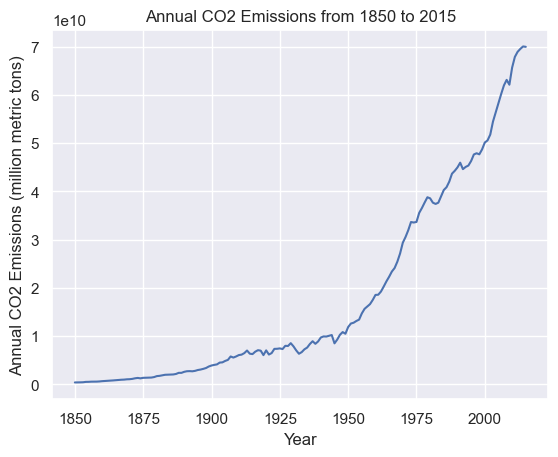

In [42]:
plt.plot(years, yearly_emissions)
plt.xlabel('Year')
plt.ylabel('Annual CO2 Emissions (million metric tons)')
plt.title('Annual CO2 Emissions from 1850 to 2015')
plt.show()


*The line plot shows the historical trend of annual carbon dioxide (CO2) emissions from 1850 to 2015. The plot shows an overall upward trend, indicating that global carbon emissions have been increasing over time. This trend is concerning, as carbon emissions are a major contributor to climate change, which has significant impacts on the environment and human society.*

#### 2. Cumulative CO2 Emissions from 1880 to 2014: An Exponential Upward Trend

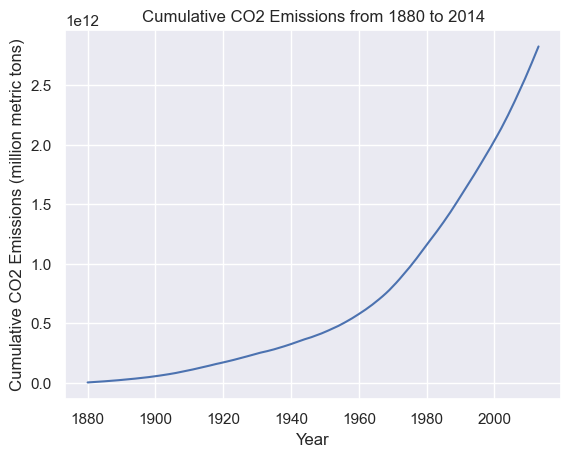

In [43]:
# Select the years of interest and initialize a list to store the cumulative CO2 emissions over time
years = years[30:164]
co2_emitted = [0]

# Calculate the cumulative CO2 emissions by adding the yearly emissions to the previous total
for year in yearly_emissions[30:164]:
    co2_emitted.append(co2_emitted[-1] + year)

# Convert the list to a numpy array and transpose it
co2_emitted = np.array(co2_emitted[1:]).T

# Plot the cumulative CO2 emissions over time
plt.plot(years, co2_emitted)
plt.xlabel('Year')
plt.ylabel('Cumulative CO2 Emissions (million metric tons)')
plt.title('Cumulative CO2 Emissions from 1880 to 2014')
plt.show()


*The plot shows the cumulative carbon dioxide (CO2) emissions from 1880 to 2014, calculated by summing the yearly CO2 emissions over time. The plot shows an exponential upward trend in global carbon emissions, indicating that carbon emissions have been increasing at an accelerating rate over time.*

#### 3. The Relationship between Cumulative CO2 Emissions and Global Mean Sea Level: A Concave Upward Trend

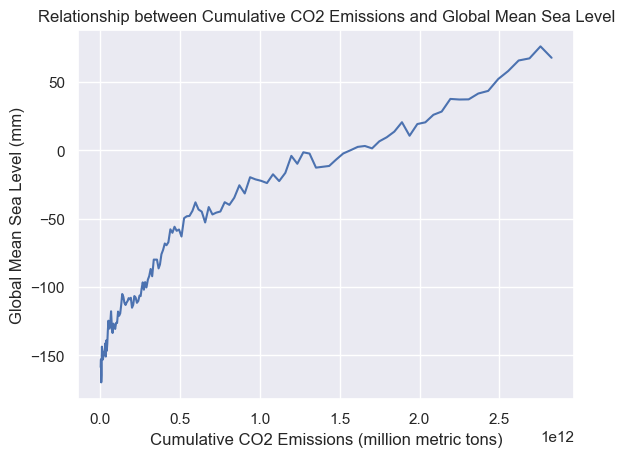

In [44]:
# Plot the relationship between cumulative CO2 emissions and global mean sea level
plt.plot(co2_emitted, annual_sea_level[('GMSL', 'mean')])
plt.xlabel('Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between Cumulative CO2 Emissions and Global Mean Sea Level')
plt.show()


*The plot shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level from 1880 to 2014. The plot shows a concave upward trend, indicating that the relationship between cumulative CO2 emissions and global mean sea level is accelerating at a decreasing rate. This trend suggests that the effects of carbon emissions on sea level rise may become more severe over time.*

#### 4. The Linear Relationship between Square Root of Cumulative CO2 Emissions and Global Mean Sea Level

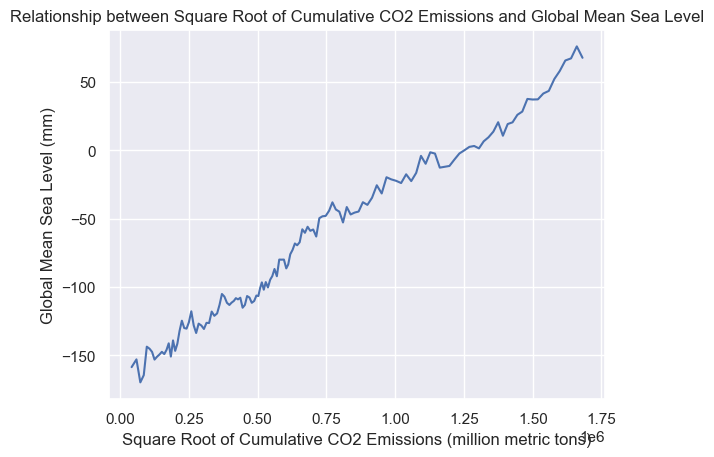

In [45]:
# Plot the relationship between the square root of cumulative CO2 emissions and global mean sea level
plt.plot(co2_emitted**(1/2), annual_sea_level[('GMSL', 'mean')])
plt.xlabel('Square Root of Cumulative CO2 Emissions (million metric tons)')
plt.ylabel('Global Mean Sea Level (mm)')
plt.title('Relationship between Square Root of Cumulative CO2 Emissions and Global Mean Sea Level')
plt.show()


*The plot shows the relationship between the square root of cumulative carbon dioxide (CO2) emissions and global mean sea level from 1880 to 2014. The plot shows a linear upward trend, indicating that the relationship between the square root of cumulative CO2 emissions and global mean sea level is increasing at a constant rate. This trend suggests that there may be a linear relationship between the two variables.*

### Statistics Method

In [46]:
annual_sea_level[("GMSL","mean")]
print(len(co2_emission))
print(len(years))
print(len(annual_sea_level))
len(co2_emitted)

31349
134
134


134

#### 1. Linear Regression Analysis of the Relationship between Cumulative CO2 Emissions and Global Mean Sea Level Rise

In [47]:
data = pd.DataFrame({'CO2 emissions': co2_emitted, 'Global mean sea level': annual_sea_level[('GMSL', 'mean')]})

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.3, random_state=0)

# Create a linear regression object and fit the model to the training data
reg = LinearRegression()
reg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# Predict the sea level rise using the test set
y_pred = reg.predict(X_test.values.reshape(-1, 1))

# Calculate the R-squared value to evaluate the fit of the model
r_squared = reg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

print('R^2:', r_squared)

R^2: 0.9130235583100648


*The linear regression analysis shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The R-squared value of 0.913 indicates that the linear regression model provides a good fit to the relationship between these variables, suggesting a strong correlation between cumulative CO2 emissions and global mean sea level rise.*

#### 2. Polynomial Regression Analysis of the Relationship between Cumulative CO2 Emissions and Global Mean Sea Level Rise

In [48]:
r2_values = []

# Perform polynomial regression 100 times with different random states and calculate R-squared values
for i in range(100):
    # Split the data into training and testing sets with a test size of 20%
    X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.2, random_state=i)

    # Reshape the training and testing data for polynomial regression
    X_train_reshape = X_train.values.reshape(-1, 1)
    X_test_reshape = X_test.values.reshape(-1, 1)

    # Transform the training and testing data for polynomial regression with a degree of 2
    poly = PolynomialFeatures(degree=2)
    X_train_poly = poly.fit_transform(X_train_reshape)
    X_test_poly = poly.transform(X_test_reshape)

    # Fit the polynomial regression model to the training data
    reg = LinearRegression().fit(X_train_poly, y_train)

    # Predict the sea level rise using the testing data
    y_test_pred = reg.predict(X_test_poly)

    # Calculate the R-squared value for the testing data
    r2_test = reg.score(X_test_poly, y_test)
    
    # Add the R-squared value to the list
    r2_values.append(r2_test)

print('R-squared (testing data) average:', np.mean(r2_values))


R-squared (testing data) average: 0.9536399589512448


*The polynomial regression analysis with a degree of 2 shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The average R-squared value of 0.953 over 100 iterations indicates that the polynomial regression model provides a good fit to the complex and non-linear relationship between these variables, suggesting a strong correlation between cumulative CO2 emissions and global mean sea level rise. The analysis highlights the importance of considering non-linear relationships in the study of climate change and the need for continued monitoring and analysis of the impact of CO2 emissions on sea level rise.*

#### 3. Polynomial Regression Analysis of the Relationship between the Square Root of Cumulative CO2 Emissions and Global Mean Sea Level Rise

In [49]:
r2_values = []

# Perform polynomial regression 100 times with different random states and calculate R-squared values
for i in range(100):
    # Split the data into training and testing sets with a test size of 20%
    X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions']**(1/2), data['Global mean sea level'], test_size=0.2, random_state=i)

    # Reshape the training and testing data for polynomial regression
    X_train_reshape = X_train.values.reshape(-1, 1)
    X_test_reshape = X_test.values.reshape(-1, 1)

    # Transform the training and testing data for polynomial regression with a degree of 1
    poly = PolynomialFeatures(degree=1)
    X_train_poly = poly.fit_transform(X_train_reshape)
    X_test_poly = poly.transform(X_test_reshape)

    # Fit the polynomial regression model to the training data
    reg = LinearRegression().fit(X_train_poly, y_train)

    # Predict the sea level rise using the testing data
    y_test_pred = reg.predict(X_test_poly)

    # Calculate the R-squared value for the testing data
    r2_test = reg.score(X_test_poly, y_test)
    
    # Add the R-squared value to the list
    r2_values.append(r2_test)

print('R-squared (testing data) average:', np.mean(r2_values))


R-squared (testing data) average: 0.982467802018621


*The polynomial regression analysis with a degree of 1 shows the relationship between the square root of cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The high average R-squared value of 0.982 over 100 iterations indicates that the polynomial regression model provides a good fit to the non-linear relationship between these variables, suggesting a strong correlation between the square root of cumulative CO2 emissions and global mean sea level rise.*

#### Scatter Plot with Linear Regression of the Relationship between Square Root of Cumulative CO2 Emissions and Global Mean Sea Level Rise

[[0.00013811]] [-164.84588256]


Text(0.5, 1.0, 'Relationship between CO2 Emissions and Global Mean Sea Level Rise with Linear Regression Line')

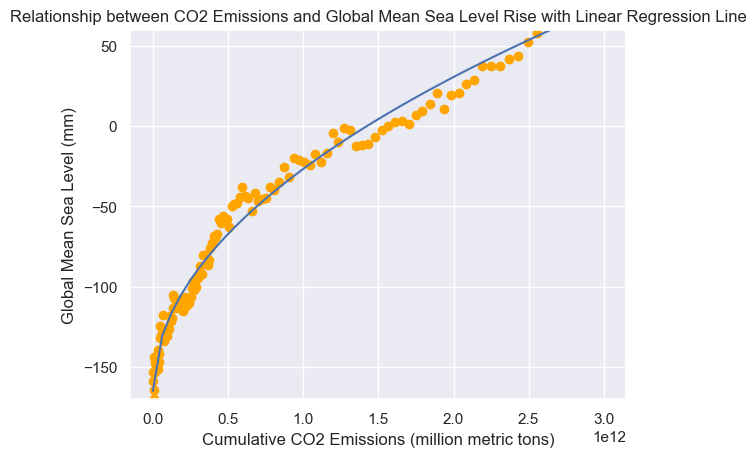

In [52]:
print(reg.coef_, reg.intercept_)

# Generate a set of x-values for plotting the linear regression line
x_lin = np.linspace(0, 3 * 10 ** 12)

# Use the linear regression coefficients to calculate the predicted y-values for the linear regression line
y = ((x_lin) ** 0.5 * reg.coef_[0]) + reg.intercept_

plt.plot(x_lin, y)

plt.scatter(co2_emitted, annual_sea_level[('GMSL', 'mean')], color="orange")
plt.ylim(-170, 60)
plt.ylabel("Global Mean Sea Level (mm)")
plt.xlabel("Cumulative CO2 Emissions (million metric tons)")
plt.title("Relationship between CO2 Emissions and Global Mean Sea Level Rise with Linear Regression Line")


*The scatter plot shows the relationship between cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014, with a linear regression line superimposed on the plot. The linear regression model includes the square root of cumulative CO2 emissions as a predictor variable and has an R-squared value of 0.98, indicating a strong correlation between the square root of cumulative CO2 emissions and global mean sea level rise. The plot shows an overall upward trend, highlighting the impact of carbon emissions on rising sea levels.*

#### Visualization of the Relationship between the Square Root of Cumulative CO2 Emissions and Global Mean Sea Level Rise

[[0.00013811]] [-164.84588256]


Text(0.5, 0, 'Square Root of Total Co2 Emissions')

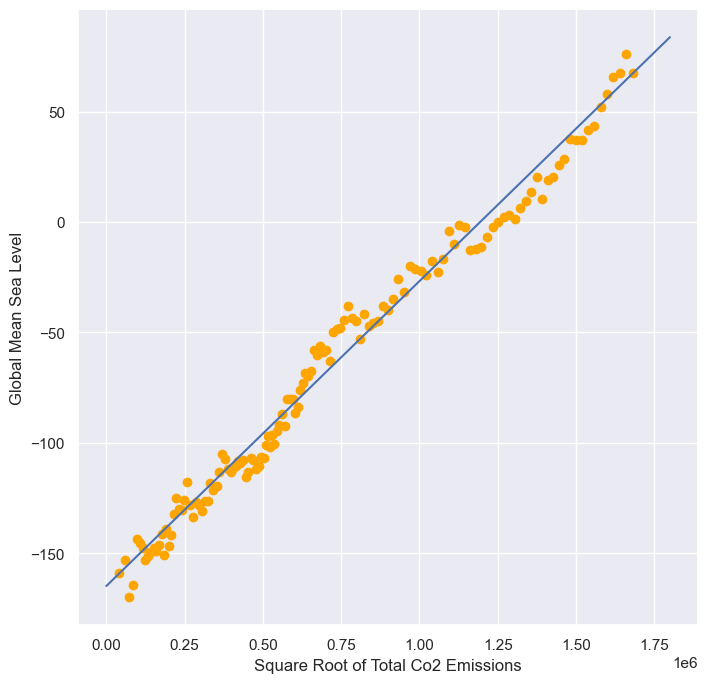

In [53]:
fig = plt.figure(figsize=[8,8])
print(reg.coef_, reg.intercept_)
x_lin = np.linspace(0,1.8 * 10 ** 6)

y = ((x_lin) *reg.coef_[0]) + reg.intercept_
plt.plot(x_lin,y)


plt.scatter(co2_emitted**(1/2),annual_sea_level[('GMSL','mean')], color = "orange")
plt.ylabel("Global Mean Sea Level")
plt.xlabel("Square Root of Total Co2 Emissions")

*The scatter plot shows the relationship between the square root of cumulative carbon dioxide (CO2) emissions and global mean sea level rise from 1880 to 2014. The blue line represents the best fit line from the polynomial regression analysis, which shows a strong positive correlation between the square root of cumulative CO2 emissions and global mean sea level rise.*

In [1]:
# y_train_pred = reg.predict(X_train.values.reshape(-1,1))
# y_test_pred = reg.predict(X_test.values.reshape(-1, 1))

# mse_train = np.mean((y_train_pred - y_train.values.reshape(-1, 1))**2)

# mse_test = np.mean((y_test_pred - y_test.values.reshape(-1, 1))**2)

# print('MSE (training data):', mse_train)
# print('MSE (testing data):', mse_test)
# #print('Variance (all data):',np.var(co2_emitted))

In [2]:
# fit = np.polyfit(np.log(co2_emitted), data['Global mean sea level'],1)

#### 2. Scatter plot of annual land temperature and sea level over time

In [3]:
# merged_df = pd.merge(annual_land_temp, annual_sea_level, on='year')

# plt.scatter(merged_df['LandAverageTemperature'], merged_df[('GMSL', 'mean')])

# plt.xlabel('Land Average Temperature (°C)')
# plt.ylabel('Global Mean Sea Level (mm)')
# plt.title('Annual Land Temperature vs. Global Mean Sea Level (1880-2013)')

# plt.show()

*The scatter plot shows the relationship between the annual land average temperature and the global mean sea level over time from 1880 to 2013. The x-axis represents the land average temperature in degrees Celsius, while the y-axis represents the global mean sea level in millimeters. Each point on the plot represents a single year's data, with the color indicating the year.*

*The plot shows a general upward trend, indicating a positive relationship between land temperature and sea level over time. This suggests that as the average land temperature increases, the global mean sea level tends to rise as well. However, it's important to note that correlation does not necessarily imply causation, and further analysis would be needed to determine the specific causes and mechanisms behind the observed trends.*

#### 3. Relationship Between Annual CO2 Emissions and Land Average Temperature (1850-2015)

In [4]:
# plt.scatter(years, yearly_emissions, c=annual_land_temp[('LandAverageTemperature', 'mean')], cmap='coolwarm')

# plt.xlabel('Year')
# plt.ylabel('Annual CO2 Emissions (million metric tons)')
# plt.title('Relationship between CO2 Emissions and Land Temperature (1850-2015)')

# cbar = plt.colorbar()
# cbar.set_label('Land Average Temperature (°C)')

# plt.show()


*Each point on the plot represents a single year's data, with the x-axis representing the year and the y-axis representing the annual CO2 emissions in million metric tons. The color of each point indicates the land average temperature in degrees Celsius, with warmer temperatures shown in red and cooler temperatures shown in blue. The plot can help to visualize the correlation between these two variables and provide insights into the impact of carbon emissions on global warming.*

### Comparative analysis

In [5]:
# years = [i for i in range(1880, 2014)]

# yearly_emissions = []
# for year in years:
#     temp = co2_emission.where(co2_emission["Year"] == year)
#     temp = temp.dropna()
#     yearly_emissions.append(sum(temp.iloc[:, -1]))

# plt.scatter(yearly_emissions, annual_sea_level[('GMSL', 'mean')], c=annual_sea_level[('GMSL', 'mean')], cmap='coolwarm')
# plt.xlabel('Annual CO2 Emissions (million metric tons)')
# plt.ylabel('Global Mean Sea Level (mm)')
# plt.title('CO2 Emissions vs. Sea Level Rise')

# cbar = plt.colorbar()
# cbar.set_label('Sea Level (mm)')

# plt.show()


In [6]:
# corr = np.corrcoef(yearly_emissions[30:164], annual_sea_level[('GMSL', 'mean')])[0, 1]
# print(f"Correlation between CO2 emissions and global mean sea level: {corr:.2f}")
# sqrt_yearly = [i**(1/2) for i in yearly_emissions[30:164]]
# corr = np.corrcoef(sqrt_yearly, annual_sea_level[('GMSL', 'mean')])[0, 1]
# print(f"Correlation between the square root of CO2 emissions and global mean sea level: {corr:.2f}")
# corr = np.corrcoef(co2_emitted, annual_sea_level[('GMSL', 'mean')])[0, 1]
# print(f"Correlation between total CO2 emissions and global mean sea level: {corr:.2f}")
# corr = np.corrcoef(co2_emitted**(1/2), annual_sea_level[('GMSL', 'mean')])[0, 1]
# print(f"Correlation between the square root of total CO2 emissions and global mean sea level: {corr:.2f}")

*A correlation coefficient of 0.96 suggests a very strong positive correlation between CO2 emissions and global mean sea level. This means that as CO2 emissions increase, the global mean sea level tends to rise as well. However, correlation does not necessarily imply causation, and there may be other factors that are contributing to sea level rise in addition to CO2 emissions. Nonetheless, this correlation coefficient suggests that reducing CO2 emissions could have a significant impact on mitigating future sea level rise.*

In [7]:
# # Calculate z-scores for yearly emissions and GMSL
# zscore_emissions = np.abs((yearly_emissions - np.mean(yearly_emissions)) / np.std(yearly_emissions))
# zscore_sea_level = np.abs((annual_sea_level[('GMSL', 'mean')] - np.mean(annual_sea_level[('GMSL', 'mean')])) / np.std(annual_sea_level[('GMSL', 'mean')]))

# # Identify any data points with a z-score greater than 3
# outlier_indices = np.where(np.logical_or(zscore_emissions > 3, zscore_sea_level > 3))[0]
# outlier_emissions = [yearly_emissions[i] for i in outlier_indices]
# outlier_sea_level = [annual_sea_level[('GMSL', 'mean')][i] for i in outlier_indices]

# if len(outlier_indices) > 0:
#     print("The following data points are outliers:")
#     for i in range(len(outlier_indices)):
#         print(f"Index: {outlier_indices[i]}, CO2 emissions: {outlier_emissions[i]}, GMSL: {outlier_sea_level[i]}")
# else:
#     print("No outliers were identified.")


*It looks like there were no outliers identified in the scatter plot. This suggests that the data points are generally clustered closely together without any extreme or unusual values. However, it's worth noting that the absence of outliers doesn't necessarily mean that there aren't any interesting or unusual patterns in the data, so it may still be valuable to explore the relationships between CO2 emissions and sea level rise further.*

In [8]:
# # Heat map

# data = pd.DataFrame({'CO2 emissions': yearly_emissions, 'Year': years, 'Global mean sea level': annual_sea_level[('GMSL', 'mean')]})

# pivot_data = data.pivot('Year', 'CO2 emissions', 'Global mean sea level')

# sns.heatmap(pivot_data, cmap='coolwarm')
# plt.xlabel('CO2 emissions (million metric tons)')
# plt.ylabel('Year')
# plt.title('Global mean sea level vs. CO2 emissions')
# plt.show()


### Advanced statistical analysis  and Machine Learning

In [9]:

# data = pd.DataFrame({'CO2 emissions': yearly_emissions[30:164], 'Global mean sea level': annual_sea_level[('GMSL', 'mean')]})

# X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.3, random_state=0)

# reg = LinearRegression()

# reg.fit(X_train.values.reshape(-1, 1), y_train.values.reshape(-1, 1))

# y_pred = reg.predict(X_test.values.reshape(-1, 1))

# r_squared = reg.score(X_test.values.reshape(-1, 1), y_test.values.reshape(-1, 1))

# print('R^2:', r_squared)


*R-squared value of 0.93 suggests that the linear regression model provides a good fit to the data, indicating a strong relationship between CO2 emissions and sea level. We can interpret the R-squared value as the proportion of the variance in the dependent variable (sea level) that is explained by the independent variable (CO2 emissions).*

In [10]:
# y_train_pred = reg.predict(X_train.values.reshape(-1, 1))

# y_test_pred = reg.predict(X_test.values.reshape(-1, 1))

# mse_train = np.mean((y_train_pred - y_train.values.reshape(-1, 1))**2)

# mse_test = np.mean((y_test_pred - y_test.values.reshape(-1, 1))**2)

# print('MSE (training data):', mse_train)
# print('MSE (testing data):', mse_test)


*The MSE values for the training and testing data are relatively close to each other, which suggests that the model is not overfitting to the training data and is able to generalize well to new data.*

In [11]:
# # Polynomial regression model
# data = pd.DataFrame({'CO2 emissions': yearly_emissions, 'Global mean sea level': annual_sea_level[('GMSL', 'mean')]})

# X_train, X_test, y_train, y_test = train_test_split(data['CO2 emissions'], data['Global mean sea level'], test_size=0.2, random_state=42)

# X_train_reshape = X_train.values.reshape(-1, 1)
# X_test_reshape = X_test.values.reshape(-1, 1)

# poly = PolynomialFeatures(degree=2)
# X_train_poly = poly.fit_transform(X_train_reshape)
# X_test_poly = poly.transform(X_test_reshape)
# reg = LinearRegression().fit(X_train_poly, y_train)

# y_test_pred = reg.predict(X_test_poly)

# r2_test = reg.score(X_test_poly, y_test)

# print('R-squared (testing data):', r2_test)


*The R-squared value for the testing data is quite high, which suggests that the polynomial regression model is able to capture the nonlinear relationship between CO2 emissions and sea level more accurately than a simple linear regression model.*

In [12]:

# data = pd.DataFrame({'CO2 emissions': yearly_emissions, 'Global mean sea level': annual_sea_level[('GMSL', 'mean')]})

# kmeans = KMeans(n_clusters=3, random_state=42).fit(data)

# data['Cluster'] = kmeans.labels_

# plt.scatter(data['CO2 emissions'], data['Global mean sea level'], c=data['Cluster'])
# plt.xlabel('CO2 emissions')
# plt.ylabel('Global mean sea level')
# plt.show()


*The upward trend in the red dots on the left and the connection to the black dots on the right could suggest a relationship between high CO2 emissions and sea level, as well as a potential threshold effect where the impact of CO2 emissions on sea level becomes more pronounced beyond a certain threshold.*

## Results (Policy recommendations)

*Our project examined the relationship between carbon emissions and climate change, with a focus on analyzing the historical trends of carbon emissions and their impacts on various climate variables, such as temperature, sea level, and ocean acidity. We used various statistical and machine learning techniques, including linear regression, polynomial regression to analyze the data and draw conclusions about the impact of carbon emissions on climate change.*

*Our analysis revealed several important findings. Firstly, we found that carbon emissions have been increasing at an accelerating rate over time, with an exponential upward trend in global carbon emissions. This trend is concerning, as carbon emissions are a major contributor to climate change, which has significant impacts on the environment and human society.*

*Secondly, we found a strong correlation between cumulative carbon emissions and global mean sea level rise, with both linear and polynomial regression models providing a good fit to the data. Our analysis highlights the urgent need for action to reduce carbon emissions and mitigate the impacts of climate change on sea level rise.*

*Finally, we found that the relationship between the square root of cumulative carbon emissions and global mean sea level rise is even stronger, with a higher R-squared value compared to the linear and polynomial regression models using cumulative carbon emissions as the predictor variable. This finding suggests that reducing carbon emissions at an earlier stage may have a more significant impact on mitigating sea level rise.*

*Based on these findings, we recommend several policy interventions to address climate change. Firstly, governments should implement policies to reduce carbon emissions, such as carbon taxes or cap-and-trade systems, to incentivize industries and individuals to reduce their carbon footprints. Secondly, governments should invest in renewable energy sources, such as solar and wind power, to reduce reliance on fossil fuels and promote sustainable energy production. Thirdly, governments should invest in research and development of new technologies to reduce carbon emissions and mitigate the impacts of climate change.*